In [1]:
import numpy as np
import pandas as pd 
import os

In [2]:
from google.colab import drive #toimport google drive data

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
train_dir = '/NEU Dataset/NEU-DET/train/images'

In [5]:
!pip install -q keras

In [6]:
import keras

In [7]:
import torch

#Check if your system supports CUDA
gpu_available = torch.cuda.is_available() # is_available returns a bool as true or false

if gpu_available:
    print('Training on GPU')
else:
    print('Training on CPU')

Training on GPU


In [8]:
train_directory='/content/drive/MyDrive/NEU Dataset/NEU-DET/train/images'
valid_directory='/content/drive/MyDrive/NEU Dataset/NEU-DET/validation/images'
test_directory='/content/drive/MyDrive/NEU Dataset/NEU-DET/test/images'

In [10]:
print("Path Directory:",os.listdir("/content/drive/MyDrive/NEU Dataset/NEU-DET"))

Path Directory: ['test', 'validation', 'train']


In [12]:
#For Scratches
print("Training Scratches data:",len(os.listdir(train_directory+'/'+'scratches')))
print("Testing Scratches data:",len(os.listdir(test_directory+'/'+'scratches')))
print("Validation Scratches data:",len(os.listdir(valid_directory+'/'+'scratches')))

#For Pitted
print("Training Pitted data:",len(os.listdir(train_directory+'/'+'pitted_surface')))
print("Testing Pitted data:",len(os.listdir(test_directory+'/'+'pitted_surface')))
print("Validation Pitted data:",len(os.listdir(valid_directory+'/'+'pitted_surface')))

#For Rolled
print("Training Rolled data:",len(os.listdir(train_directory+'/'+'rolled-in_scale')))
print("Testing Rolled data:",len(os.listdir(test_directory+'/'+'rolled-in_scale')))
print("Validation Rolled data:",len(os.listdir(valid_directory+'/'+'rolled-in_scale')))

#For Patches
print("Training Patches data:",len(os.listdir(train_directory+'/'+'patches')))
print("Testing Patches data:",len(os.listdir(test_directory+'/'+'patches')))
print("Validation Patches data:",len(os.listdir(valid_directory+'/'+'patches')))

#For Inclusion
print("Training Inclusion data:",len(os.listdir(train_directory+'/'+'inclusion')))
print("Testing Inclusion data:",len(os.listdir(test_directory+'/'+'inclusion')))
print("Validation Inclusion data:",len(os.listdir(valid_directory+'/'+'inclusion')))

#For Crazing
print("Training Crazing data:",len(os.listdir(train_directory+'/'+'crazing')))
print("Testing Crazing data:",len(os.listdir(test_directory+'/'+'crazing')))
print("Validation Crazing data:",len(os.listdir(valid_directory+'/'+'crazing')))

Training Scratches data: 210
Testing Scratches data: 45
Validation Scratches data: 45
Training Pitted data: 210
Testing Pitted data: 45
Validation Pitted data: 45
Training Rolled data: 210
Testing Rolled data: 45
Validation Rolled data: 45
Training Patches data: 210
Testing Patches data: 45
Validation Patches data: 45
Training Inclusion data: 210
Testing Inclusion data: 45
Validation Inclusion data: 45
Training Crazing data: 210
Testing Crazing data: 45
Validation Crazing data: 45


In [13]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [14]:
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)


test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 10 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_directory,
        target_size=(200, 200),
        batch_size=10,
        class_mode='categorical')

# Flow validation images in batches of 10 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        valid_directory,
        target_size=(200, 200),
        batch_size=10,
        class_mode='categorical')




#REFERENCE
#https://faroit.com/keras-docs/1.2.2/preprocessing/image/
#https://www.linkedin.com/pulse/keras-image-preprocessing-scaling-pixels-training-adwin-jahn/
#https://www.analyticsvidhya.com/blog/2020/08/image-augmentation-on-the-fly-using-keras-imagedatagenerator/
#https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html

Found 1260 images belonging to 6 classes.
Found 270 images belonging to 6 classes.


In [15]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') > 0.98 ):
            print("\nReached 98% accuracy so cancelling training!")
            self.model.stop_training = True 

In [16]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D



input_shape = (200, 200, 3)
num_classes = 6

model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5),activation='relu',padding = 'Same',input_shape=input_shape))
model.add(Conv2D(32,kernel_size=(5, 5), activation='relu',padding = 'Same',))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (5, 5), activation='relu',padding = 'Same'))
model.add(Conv2D(64, (5, 5), activation='relu',padding = 'Same'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.40))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 200, 200, 32)      2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 200, 200, 32)      25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 100, 100, 32)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 100, 100, 32)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 100, 100, 64)      51264     
                                                                 
 conv2d_3 (Conv2D)           (None, 100, 100, 64)      102464    
                                                        

In [17]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
print('Compiled!')

Compiled!


In [18]:
callbacks = myCallback()
history = model.fit(train_generator,
        batch_size = 32, #power to 2 (2^n)
        epochs=50,
        validation_data=validation_generator,
        callbacks=[callbacks],
        verbose=1, shuffle=True)

Epoch 1/50
126/126 [==============================] - 337s 3s/step - loss: 2.5001 - accuracy: 0.2127 - val_loss: 1.7656 - val_accuracy: 0.2333
Epoch 2/50
126/126 [==============================] - 17s 130ms/step - loss: 1.6590 - accuracy: 0.3135 - val_loss: 1.9864 - val_accuracy: 0.0630
Epoch 3/50
126/126 [==============================] - 16s 128ms/step - loss: 1.5695 - accuracy: 0.3373 - val_loss: 1.9153 - val_accuracy: 0.2111
Epoch 4/50
126/126 [==============================] - 16s 127ms/step - loss: 1.5027 - accuracy: 0.3849 - val_loss: 2.1872 - val_accuracy: 0.0741
Epoch 5/50
126/126 [==============================] - 16s 128ms/step - loss: 1.5162 - accuracy: 0.4405 - val_loss: 2.8450 - val_accuracy: 0.2852
Epoch 6/50
126/126 [==============================] - 16s 128ms/step - loss: 1.4473 - accuracy: 0.4532 - val_loss: 2.0645 - val_accuracy: 0.3778
Epoch 7/50
126/126 [==============================] - 16s 128ms/step - loss: 1.3631 - accuracy: 0.5048 - val_loss: 2.8087 - val_accu

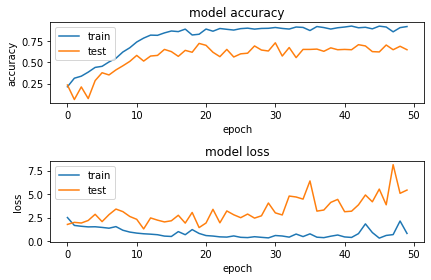

In [19]:
import matplotlib.pyplot as plt 
fig=plt.figure(1)  
# summarize history for accuracy  
plt.subplot(211)  
plt.plot(history.history['accuracy'])  
plt.plot(history.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
fig.tight_layout()

 # summarize history for loss  

plt.subplot(212)  


plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')
fig.tight_layout()
plt.show()

In [20]:
from sklearn.datasets import load_files
import numpy as np
def load_dataset(path):
    data = load_files(path)
    files = np.array(data['filenames'])
    targets = np.array(data['target'])
    target_labels = np.array(data['target_names'])
    return files,targets,target_labels
    
x_test, y_test,target_labels = load_dataset(test_directory)

In [ ]:
print(x_test)

In [23]:
# We just have the file names in the x set. Let's load the images and convert them into array.
from keras.preprocessing.image import array_to_img, img_to_array, load_img

def convert_image_to_array(files):
    images_as_array=[]
    for file in files:
        # Convert to Numpy Array
        images_as_array.append(img_to_array(load_img(file)))
    return images_as_array

x_test = np.array(convert_image_to_array(x_test))
print('Test set shape : ',x_test.shape)

Test set shape :  (270, 200, 200, 3)


In [25]:
x_test.shape

(270, 200, 200, 3)

In [26]:
print(y_test)

[1 3 3 4 5 4 3 4 5 0 5 3 2 2 0 3 1 4 1 5 3 1 0 1 5 1 4 3 4 2 2 1 5 4 5 5 2
 3 4 4 2 0 3 5 5 0 4 2 0 5 4 4 4 3 0 0 4 2 0 4 1 3 2 2 1 0 4 3 3 2 2 0 3 5
 1 1 2 4 5 2 0 2 4 5 5 0 5 3 0 2 1 4 4 3 2 0 3 1 1 1 1 0 4 4 2 5 0 0 2 5 5
 0 2 0 0 5 3 1 1 5 3 1 0 4 4 1 4 1 1 0 5 2 3 1 0 3 1 0 0 1 4 2 1 3 4 2 5 3
 0 4 3 3 3 3 2 4 2 5 2 3 0 2 0 2 2 4 1 1 1 1 5 3 0 5 3 1 2 2 5 5 0 1 1 3 2
 3 5 5 5 4 2 5 5 0 2 2 0 1 3 1 0 2 4 4 0 2 2 5 0 0 2 1 3 4 2 0 0 4 2 4 3 3
 4 0 5 2 4 5 5 0 3 3 5 3 0 3 4 2 1 5 3 1 4 5 4 2 3 5 1 1 0 3 1 5 3 5 0 4 1
 1 1 5 4 0 4 5 4 2 1 3]


In [28]:
no_of_classes = len(np.unique(y_test))
no_of_classes

6

In [29]:
from keras.utils import np_utils
y_test_one_encoded = np_utils.to_categorical(y_test,no_of_classes)

In [33]:
x_test = x_test.astype('float32')/255

In [34]:
y_pred = model.predict(x_test)

In [36]:
print(y_pred)

[[1.1457128e-07 9.9144262e-01 6.1488657e-07 4.5228252e-04 2.4398984e-08
  8.1042796e-03]
 [2.4434370e-03 1.2691353e-03 6.4762391e-04 8.9056498e-01 7.8777574e-02
  2.6297377e-02]
 [1.5291403e-04 7.6751683e-05 1.0673719e-05 9.9928147e-01 4.0030229e-04
  7.7821511e-05]
 ...
 [0.0000000e+00 0.0000000e+00 1.0000000e+00 0.0000000e+00 0.0000000e+00
  1.1057382e-23]
 [6.4800446e-14 9.9996781e-01 1.7632885e-12 2.1437846e-07 1.9511580e-11
  3.1984120e-05]
 [2.0012001e-06 2.7236409e-31 8.6760956e-08 9.9999785e-01 1.0095716e-13
  5.6934279e-12]]


In [37]:
y_predd = np.argmax(np.round(y_pred),axis=1)

In [38]:
print(y_predd)

[1 3 3 1 5 1 3 1 5 3 5 3 2 2 3 3 3 1 1 5 3 1 3 1 5 1 1 0 1 2 2 1 5 4 5 5 2
 5 4 1 2 0 0 1 5 0 1 2 0 2 1 4 1 3 0 0 1 2 0 1 1 3 2 2 1 3 1 5 1 2 2 0 3 5
 1 1 2 4 1 2 0 2 4 5 5 3 5 1 3 2 1 1 4 3 2 3 3 1 1 1 1 3 1 4 2 2 0 0 2 5 2
 3 2 0 0 5 3 1 1 1 3 3 3 4 4 1 4 1 1 3 5 2 3 3 0 3 1 0 0 1 1 2 0 3 1 2 0 3
 0 4 3 3 5 3 2 1 2 5 2 3 0 2 3 2 2 4 1 1 0 1 5 3 3 5 3 1 2 2 5 5 0 1 1 3 2
 3 1 5 1 4 2 5 5 0 2 2 3 1 3 1 0 2 4 1 0 2 2 5 3 0 2 1 0 4 2 0 3 1 2 1 3 3
 1 0 5 2 1 5 5 0 3 3 5 3 0 3 4 2 1 5 0 1 4 0 4 2 3 5 1 1 3 3 1 5 5 1 0 1 1
 1 1 0 4 3 1 5 1 2 1 3]


In [42]:
test_eval = model.evaluate(x_test,y_test_one_encoded, verbose=0)

In [40]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 1.8835525512695312
Test accuracy: 0.7518518567085266


In [44]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(y_test, y_predd, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.75      0.60      0.67        45
     Class 1       0.54      0.89      0.67        45
     Class 2       0.94      1.00      0.97        45
     Class 3       0.62      0.78      0.69        45
     Class 4       1.00      0.42      0.59        45
     Class 5       0.89      0.73      0.80        45

    accuracy                           0.74       270
   macro avg       0.79      0.74      0.73       270
weighted avg       0.79      0.74      0.73       270

